# Use ChromVAR analyze varability of chromatin accessibility

In [1]:
library(repr)
options(repr.plot.width=14, repr.plot.height=14)

In [2]:
library(tidyverse)

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
setwd("/c/groups/sanjana_lab/cdai/TFscreen")

In [4]:
suppressMessages(inter_matrix_unnested <- read_csv("./Interaction_matrix_nofilter_AllTF_20200107.csv"))

In [5]:
suppressMessages(NGN.started.network.df <- read_csv("./NGN_started_network_20200107.csv"))

In [6]:
inter2 = left_join(inter_matrix_unnested, NGN.started.network.df[, c(1,2,40)], by = c("regulator_gene", "target_gene")) %>%
            mutate("inNetwork"=if_else(is.na(lev), "not_in_network", "in_network"))

In [7]:
inter2

regulator_gene,target_gene,atac.ES,atac.H16,atac.D1,atac.D4,tar.ge.ES,tar.ge.H16,tar.ge.D1,tar.ge.D4,⋯,reg.l2fc.H16,reg.l2fc.D1,reg.l2fc.D4,reg.fdr.H16,reg.fdr.D1,reg.fdr.D4,reg.isHit,tar.isHit,lev,inNetwork
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<chr>
AR,ABTB1,6.5853932,6.045427,6.030358,6.0848461,1.5938046,1.1400300,0.9142180,2.2346859,⋯,-0.507919,-0.4858691,-3.236964,0.7647186,0.6979496,3.529782e-05,FALSE,FALSE,NA,not_in_network
AR,ADNP2,3.9458542,3.821774,3.677170,4.2185032,9.0984955,9.2918817,11.2987994,5.9482094,⋯,-0.507919,-0.4858691,-3.236964,0.7647186,0.6979496,3.529782e-05,FALSE,FALSE,NA,not_in_network
AR,AEBP2,3.6779282,3.229206,3.158372,2.5311053,8.1074589,6.0346334,5.2540640,4.7743804,⋯,-0.507919,-0.4858691,-3.236964,0.7647186,0.6979496,3.529782e-05,FALSE,FALSE,NA,not_in_network
AR,AFF3,6.9446453,7.350014,6.438632,7.4945857,0.8340168,2.1015446,2.5902853,8.4704284,⋯,-0.507919,-0.4858691,-3.236964,0.7647186,0.6979496,3.529782e-05,FALSE,FALSE,NA,not_in_network
AR,AHR,2.1433869,2.824849,2.431383,1.4060172,1.7661186,1.9019134,1.3321688,0.8802291,⋯,-0.507919,-0.4858691,-3.236964,0.7647186,0.6979496,3.529782e-05,FALSE,TRUE,NA,not_in_network
AR,ALX1,6.6249060,7.051463,7.140238,5.5330483,0.9768808,1.1676118,0.3451996,1.0828398,⋯,-0.507919,-0.4858691,-3.236964,0.7647186,0.6979496,3.529782e-05,FALSE,FALSE,NA,not_in_network
AR,ANKRD10,2.2307741,2.497425,2.056624,1.1241358,12.5809967,11.3439260,11.3539175,11.4952541,⋯,-0.507919,-0.4858691,-3.236964,0.7647186,0.6979496,3.529782e-05,FALSE,FALSE,NA,not_in_network
AR,ANKRD42,5.8244017,5.982164,5.775528,6.0825914,2.6932234,2.4194333,1.9972767,2.8585639,⋯,-0.507919,-0.4858691,-3.236964,0.7647186,0.6979496,3.529782e-05,FALSE,FALSE,NA,not_in_network
AR,ANKRD45,3.7776492,3.797207,3.653944,3.0919461,0.3672099,0.6560163,0.3312583,0.0000000,⋯,-0.507919,-0.4858691,-3.236964,0.7647186,0.6979496,3.529782e-05,FALSE,FALSE,NA,not_in_network


##### Interaction binding sites raw read counts

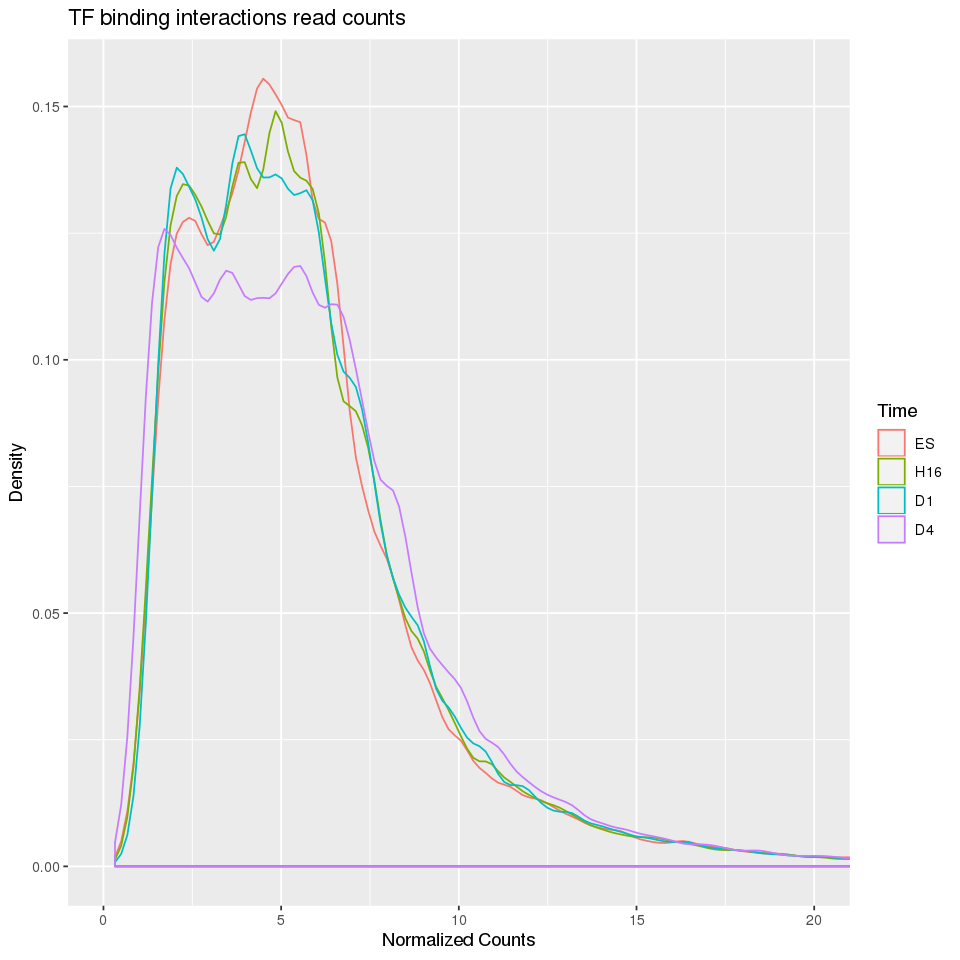

In [15]:
# not separating networks
select(inter2, atac.ES,atac.H16, atac.D1, atac.D4, inNetwork) %>% 
    pivot_longer(cols = c(atac.ES,atac.H16, atac.D1, atac.D4), names_to = "Time") %>% 
    mutate_at("Time", ~ str_remove(.x, "atac.")) %>% 
    mutate_at("Time", ~ factor(.x, c("ES", "H16", "D1", "D4") )) %>%
    ggplot(.) + geom_density(aes(x = value, color = Time)) +
    coord_cartesian(xlim = c(0,20)) + 
    labs(title = "TF binding interactions read counts") + xlab("Normalized Counts") + ylab("Density")

In [16]:
g1 <- select(inter2, atac.ES,atac.H16, atac.D1, atac.D4, inNetwork) %>% 
    pivot_longer(cols = c(atac.ES,atac.H16, atac.D1, atac.D4), names_to = "Time") %>% 
    mutate_at("Time", ~ str_remove(.x, "atac.")) %>% 
    mutate_at("Time", ~ factor(.x, c("ES", "H16", "D1", "D4") )) %>%
    ggplot(.) + geom_density(aes(x = value, color = Time)) +
    coord_cartesian(xlim = c(0,20)) + 
    labs(title = "TF binding interactions read counts") + xlab("Normalized Counts") + ylab("Density")

In [12]:
Networklables = c("in_network" = "In Network", "not_in_network"="Not in Network")

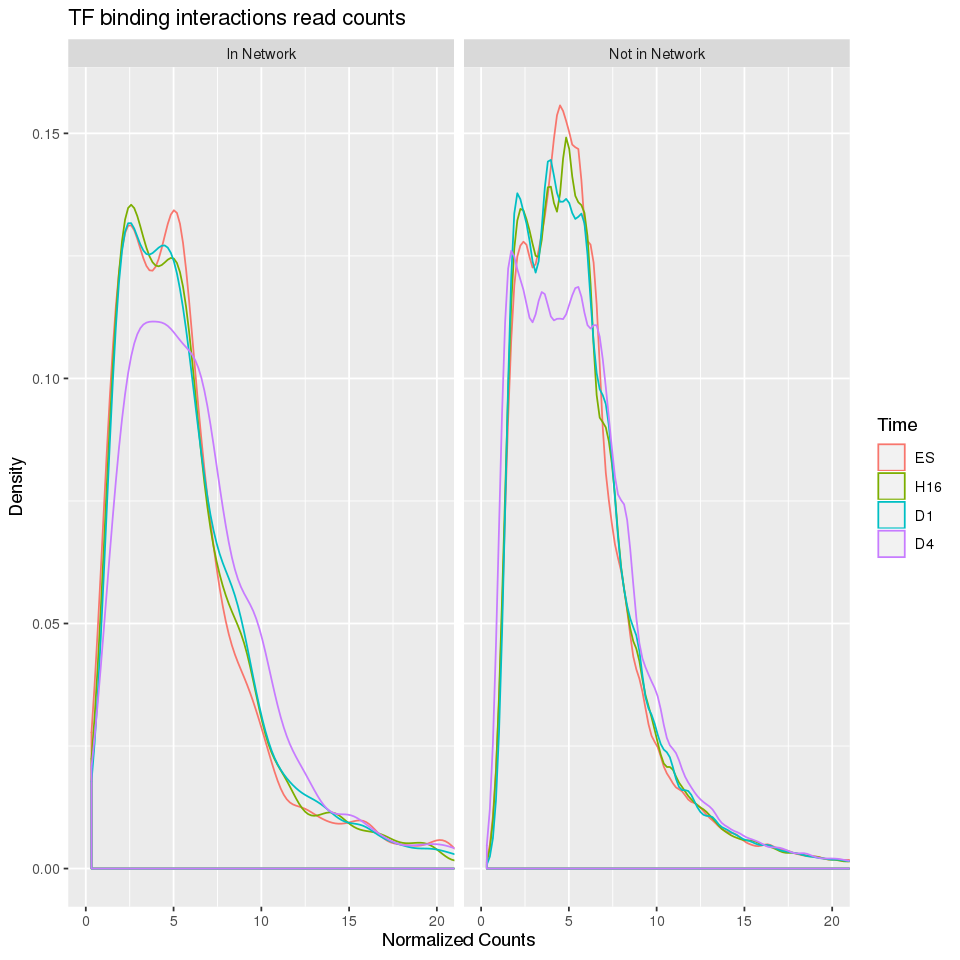

In [17]:
g1 + facet_wrap(~inNetwork, ncol = 2, labeller = as_labeller(Networklables))

##### Interaction binding sites normalized read counts

In [496]:
g1.norm = select(inter2, atac.cnt.ES,atac.cnt.H16, atac.cnt.D1, atac.cnt.D4, inNetwork) %>% 
    pivot_longer(cols = c(atac.cnt.ES,atac.cnt.H16, atac.cnt.D1, atac.cnt.D4), names_to = "Time") %>% 
    mutate_at("Time", ~ str_remove(.x, "atac.cnt.")) %>% 
    mutate_at("Time", ~ factor(.x, c("ES", "H16", "D1", "D4") )) %>%
    ggplot(.) + geom_density(aes(x = value, color = Time), alpha = 1) +
    coord_cartesian(xlim = c(0,1000)) + 
    labs(title = "TF binding interactions read counts (raw)") + xlab("raw Count") + ylab("Density")

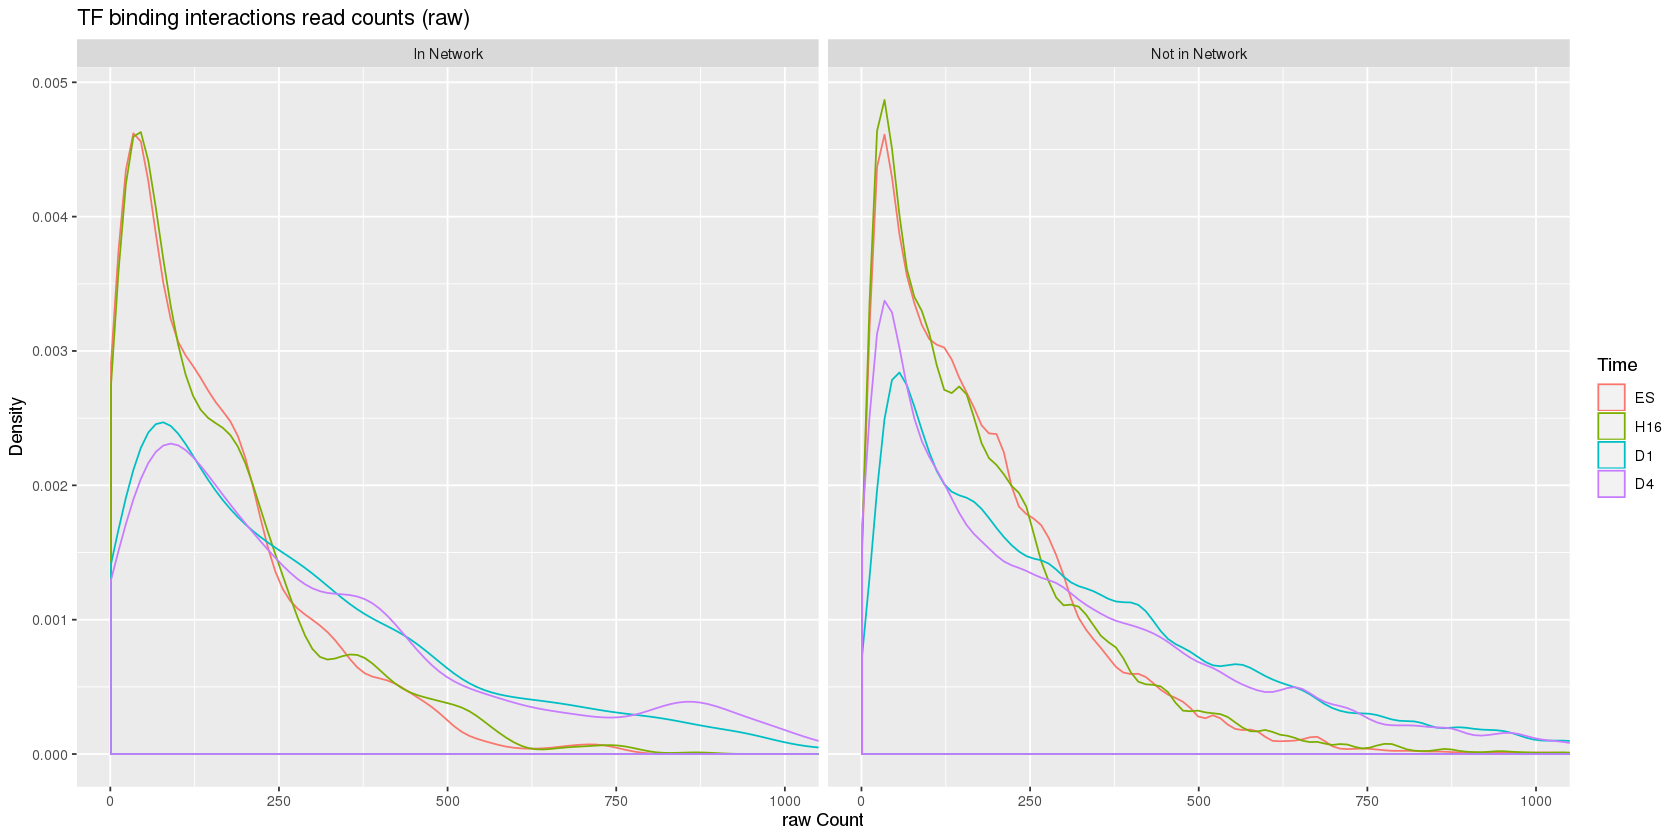

In [497]:
g1.norm + facet_wrap(~inNetwork, ncol = 2, labeller = as_labeller(Networklables))

### plot distribution of interaction correlations

##### Correlation between binding site read counts and gene expression

In [18]:
inter2 %>% names  %>% print

 [1] "regulator_gene" "target_gene"    "atac.ES"        "atac.H16"      
 [5] "atac.D1"        "atac.D4"        "tar.ge.ES"      "tar.ge.H16"    
 [9] "tar.ge.D1"      "tar.ge.D4"      "corr"           "cor_p"         
[13] "l2fc.H16"       "l2fc.D1"        "l2fc.D4"        "fdr.H16"       
[17] "fdr.D1"         "fdr.D4"         "atac.cnt.ES"    "atac.cnt.H16"  
[21] "atac.cnt.D1"    "atac.cnt.D4"    "reg.cnt.ES"     "reg.cnt.H16"   
[25] "reg.cnt.D1"     "reg.cnt.D4"     "tar.cnt.ES"     "tar.cnt.H16"   
[29] "tar.cnt.D1"     "tar.cnt.D4"     "reg.l2fc.H16"   "reg.l2fc.D1"   
[33] "reg.l2fc.D4"    "reg.fdr.H16"    "reg.fdr.D1"     "reg.fdr.D4"    
[37] "reg.isHit"      "tar.isHit"      "lev"            "inNetwork"     


In [19]:
select(inter2, corr, cor_p, inNetwork, lev, reg.isHit) %>% head

corr,cor_p,inNetwork,lev,reg.isHit
<dbl>,<dbl>,<chr>,<chr>,<lgl>
0.2250825,0.77491751,not_in_network,NA,FALSE
-0.9825175,0.01748247,not_in_network,NA,FALSE
0.8967157,0.10328427,not_in_network,NA,FALSE
0.5447559,0.45524407,not_in_network,NA,FALSE
0.8295724,0.17042762,not_in_network,NA,FALSE
-0.4503133,0.54968673,not_in_network,NA,FALSE


In [20]:
inter2[, 1:12] %>% head

regulator_gene,target_gene,atac.ES,atac.H16,atac.D1,atac.D4,tar.ge.ES,tar.ge.H16,tar.ge.D1,tar.ge.D4,corr,cor_p
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AR,ABTB1,6.585393,6.045427,6.030358,6.084846,1.5938046,1.140030,0.9142180,2.2346859,0.2250825,0.77491751
AR,ADNP2,3.945854,3.821774,3.677170,4.218503,9.0984955,9.291882,11.2987994,5.9482094,-0.9825175,0.01748247
AR,AEBP2,3.677928,3.229206,3.158372,2.531105,8.1074589,6.034633,5.2540640,4.7743804,0.8967157,0.10328427
AR,AFF3,6.944645,7.350014,6.438632,7.494586,0.8340168,2.101545,2.5902853,8.4704284,0.5447559,0.45524407
AR,AHR,2.143387,2.824849,2.431383,1.406017,1.7661186,1.901913,1.3321688,0.8802291,0.8295724,0.17042762
AR,ALX1,6.624906,7.051463,7.140238,5.533048,0.9768808,1.167612,0.3451996,1.0828398,-0.4503133,0.54968673


Warning message:
“Removed 381 rows containing non-finite values (stat_density).”


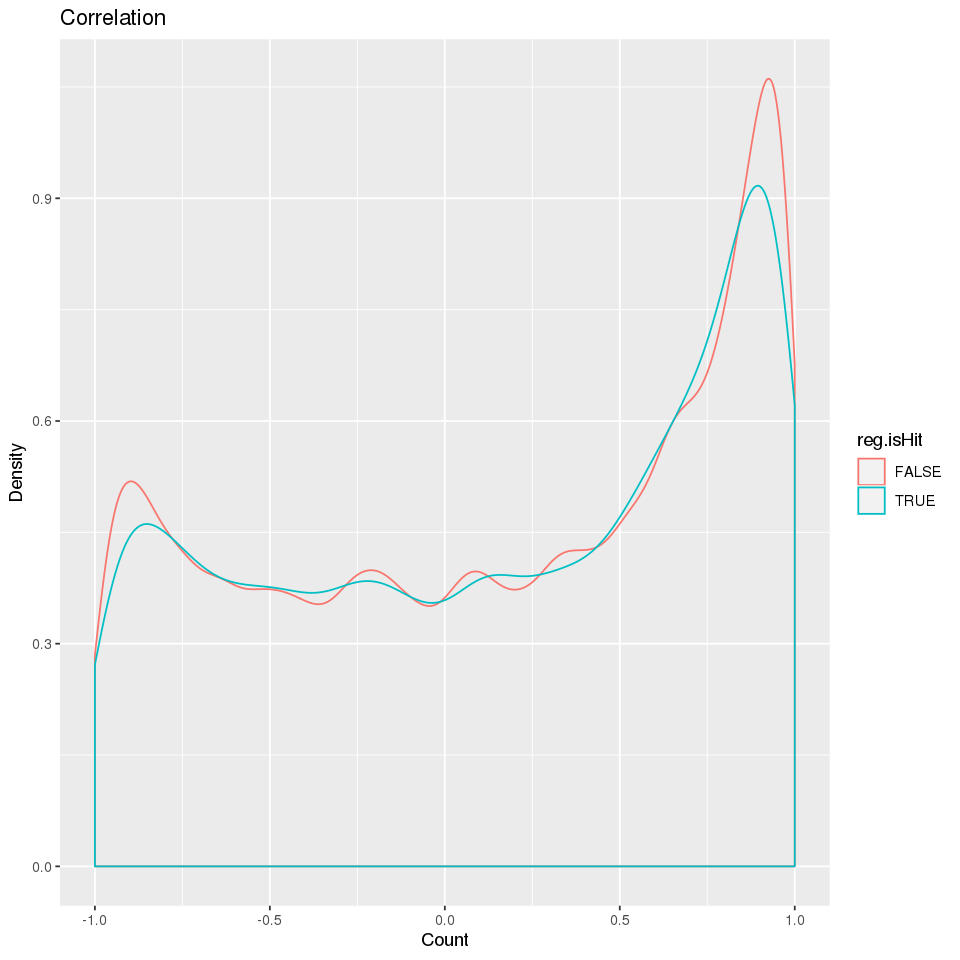

In [21]:
g2 <- select(inter2, corr, cor_p, inNetwork, lev, reg.isHit) %>%
    ggplot(.) + geom_density(aes(x = corr, color = reg.isHit)) +
    labs(title = "Correlation") + xlab("Count") + ylab("Density")
g2

#g2 + facet_wrap(~reg.isHit)

In [522]:
g2.2 <- select(inter2, corr, cor_p, inNetwork, lev, reg.isHit) %>%
    ggplot(.) + geom_density(aes(x = cor_p, color = reg.isHit), alpha =.5) +
    labs(title = "Correlation Pvalue") + xlab("Count") + ylab("Density")


Warning message:
“Removed 381 rows containing non-finite values (stat_density).”
Warning message:
“Removed 381 rows containing non-finite values (stat_density).”


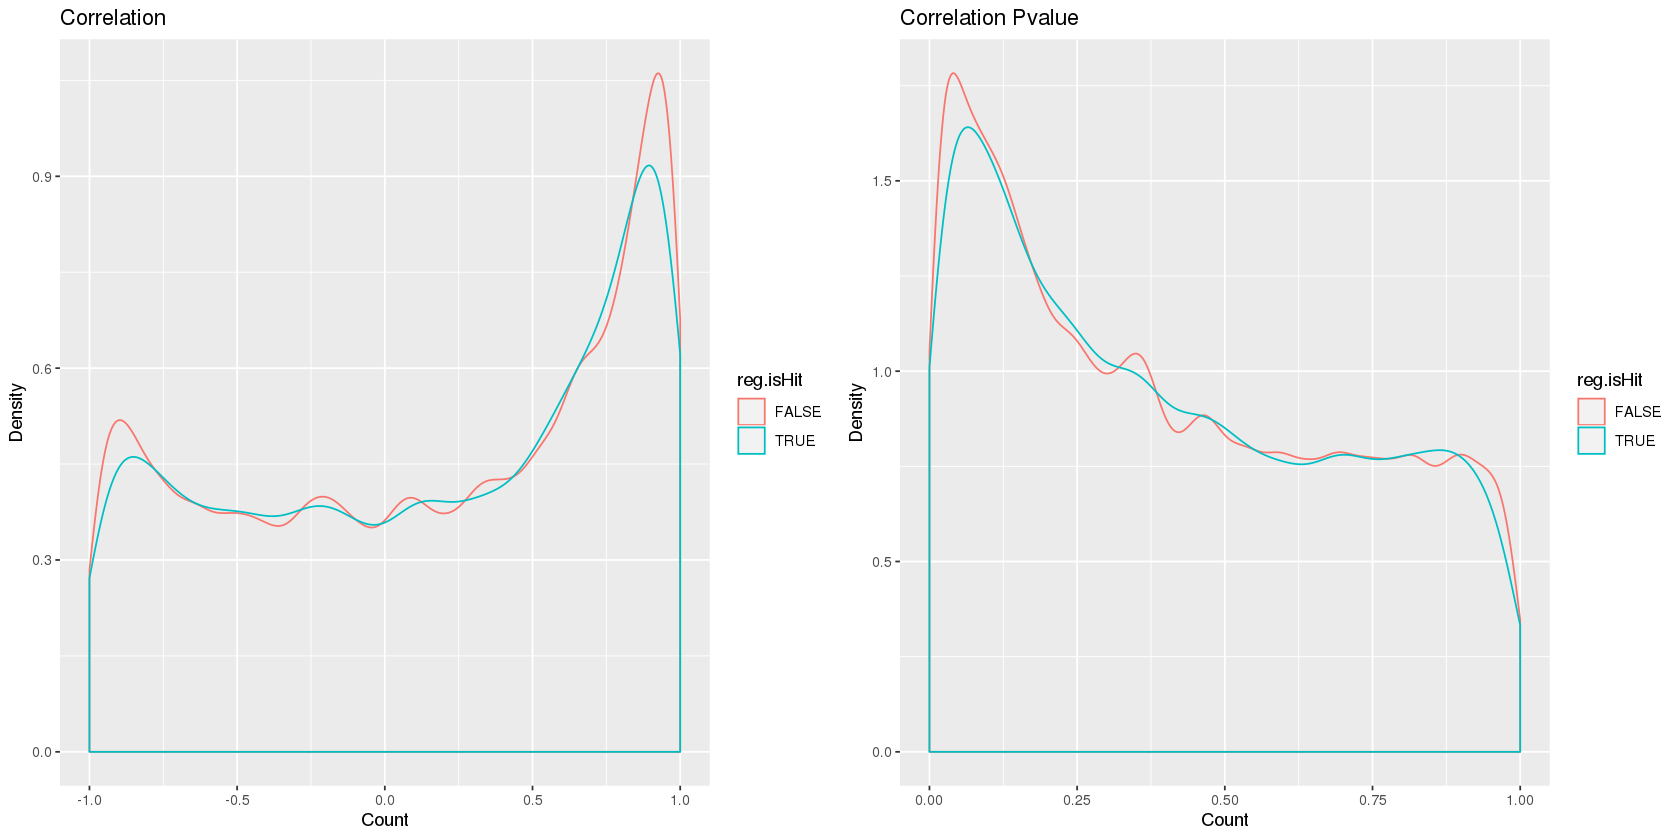

In [527]:
gridExtra::grid.arrange(g2, g2.2, ncol=2)

## Network statistics

In [22]:
head(NGN.started.network.df,2)

regulator_gene,target_gene,atac.ES,atac.H16,atac.D1,atac.D4,tar.ge.ES,tar.ge.H16,tar.ge.D1,tar.ge.D4,⋯,reg.l2fc.H16,reg.l2fc.D1,reg.l2fc.D4,reg.fdr.H16,reg.fdr.D1,reg.fdr.D4,reg.isHit,tar.isHit,reg.cnt.sum,lev
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<chr>
NEUROG1,CBFA2T2,1.679658,4.012907,4.578127,4.932282,4.6431396,8.862469,11.04853,10.72681,⋯,8.170744,9.63489,11.11691,7.875081e-22,5.935372e-31,5.633972e-42,TRUE,FALSE,539,lev1
NEUROG1,EBF1,4.591357,6.043470,6.011842,9.017202,0.6696824,1.437124,3.89979,20.30154,⋯,8.170744,9.63489,11.11691,7.875081e-22,5.935372e-31,5.633972e-42,TRUE,TRUE,539,lev1


In [23]:
targets_by_lev <- map_df(c("lev1", "lev2", "lev3"), ~ filter(NGN.started.network.df, lev == .x) %>% select(target_gene, lev) %>% unique)

In [24]:
# Get nework node stats
suppressMessages(NGN.network.node_stats <- read_csv("NGN_started_network_20200107_node.csv"))

NGN.network.node_stats <- NGN.network.node_stats %>% select(-(reg.cnt.D1:reg.fdr.H16), 
                                                            -(reg.l2fc.D1:reg.l2fc.H16), 
                                                            -(tar.cnt.D1:tar.cnt.H16), 
                                                            -SUID, -SelfLoops, -`shared name`, -AverageShortestPathLength) %>% 
                            mutate("isHit"=(reg.isHit | tar.isHit)) %>% 
                            mutate_at("isHit", ~if_else(.x == F | is.na(.x), F, T))

In [25]:
NGN.network.node_stats <- left_join(NGN.network.node_stats, targets_by_lev, by = c("name"="target_gene"))

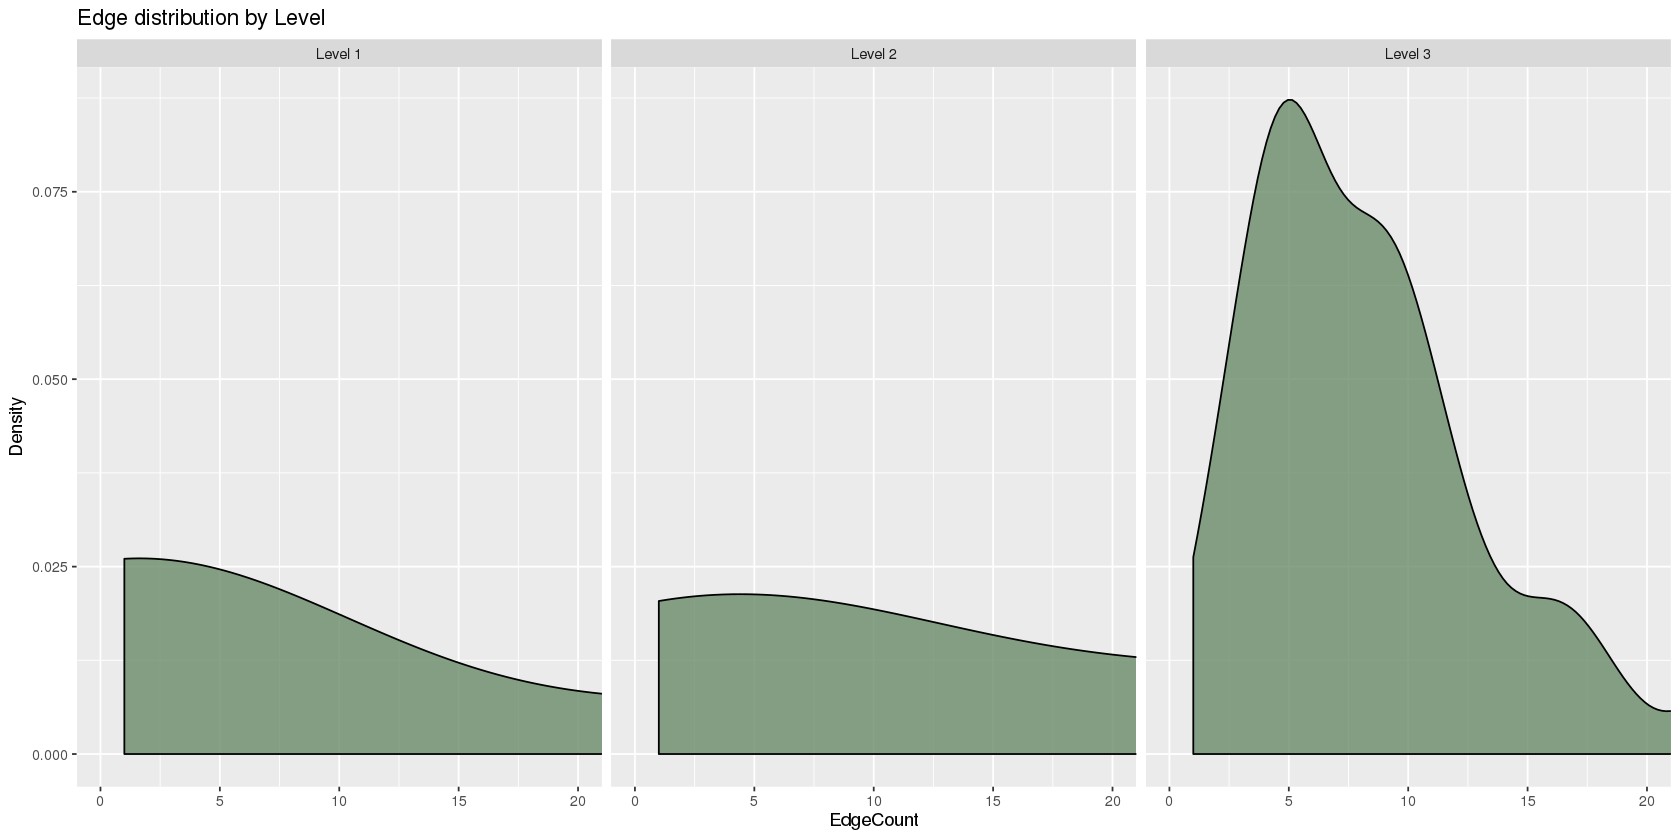

In [457]:
gg.network.degrees1 <- ggplot(filter(NGN.network.node_stats, !is.na(lev))) + geom_density(aes(x = EdgeCount), fill = "darkseagreen4",alpha = .8) +
    xlab("EdgeCount") + ylab("Density") + labs(title = "Edge distribution by Level") + coord_cartesian(xlim = c(0,20))
gg.network.degrees1 + facet_wrap(. ~ lev, nrow = 1, labeller = as_labeller(c("lev1"="Level 1", "lev2"="Level 2", "lev3"="Level 3")))

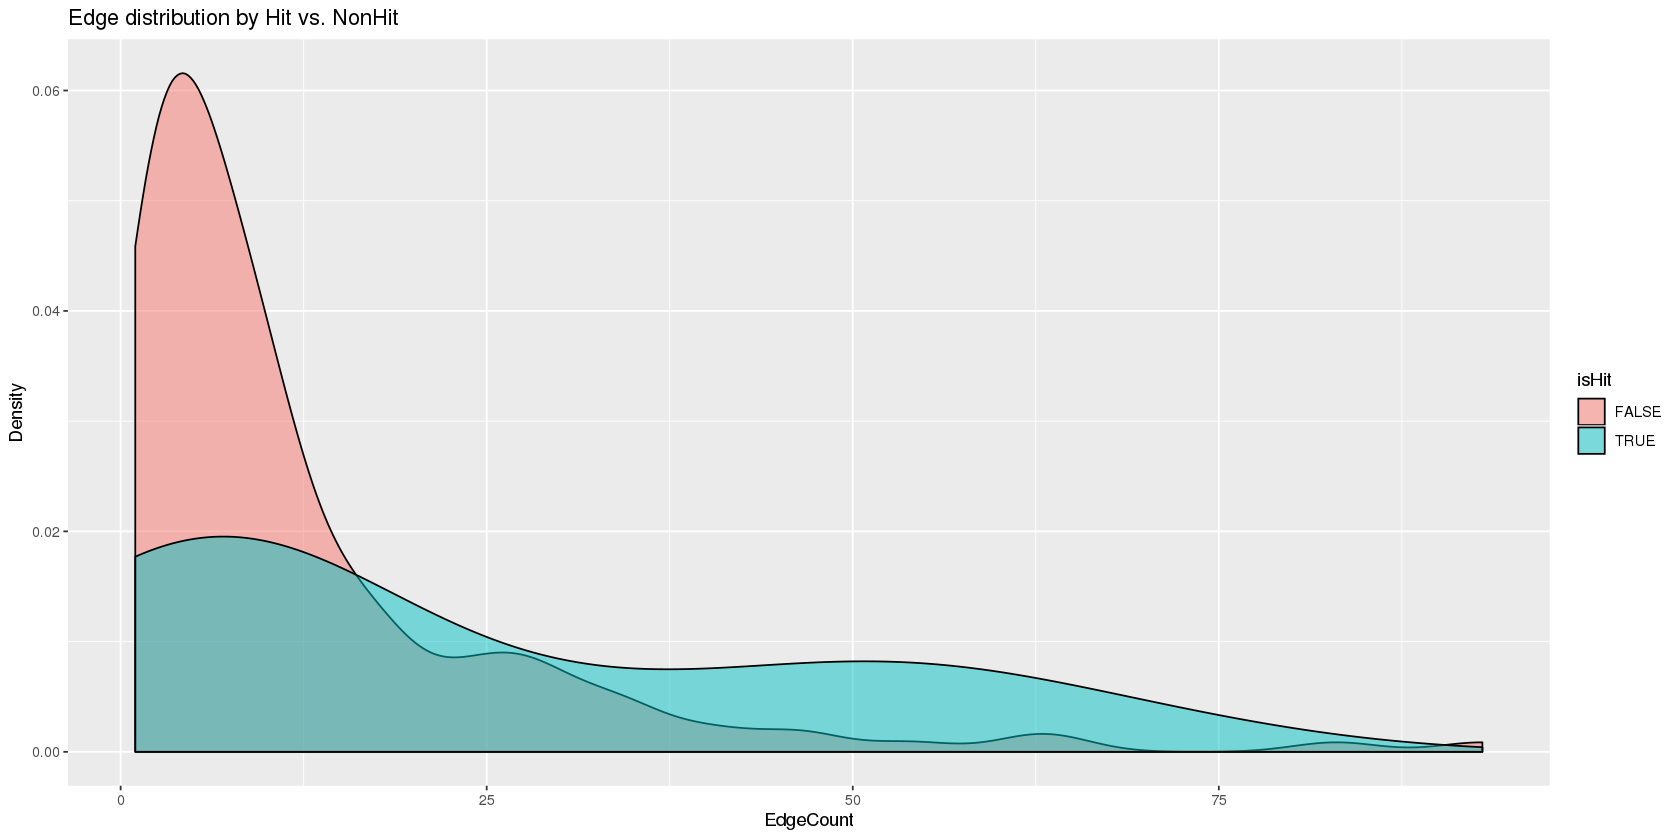

In [451]:
gg.network.degrees2 <- ggplot(NGN.network.node_stats) + geom_density(aes(x = EdgeCount, fill = isHit), alpha = .5) +
    xlab("EdgeCount") + ylab("Density") + labs(title = "Edge distribution by Hit vs. NonHit")
gg.network.degrees2

In [431]:
gg.network.degrees3 <- ggplot(NGN.network.node_stats) + geom_bar(aes(x = EdgeCount))

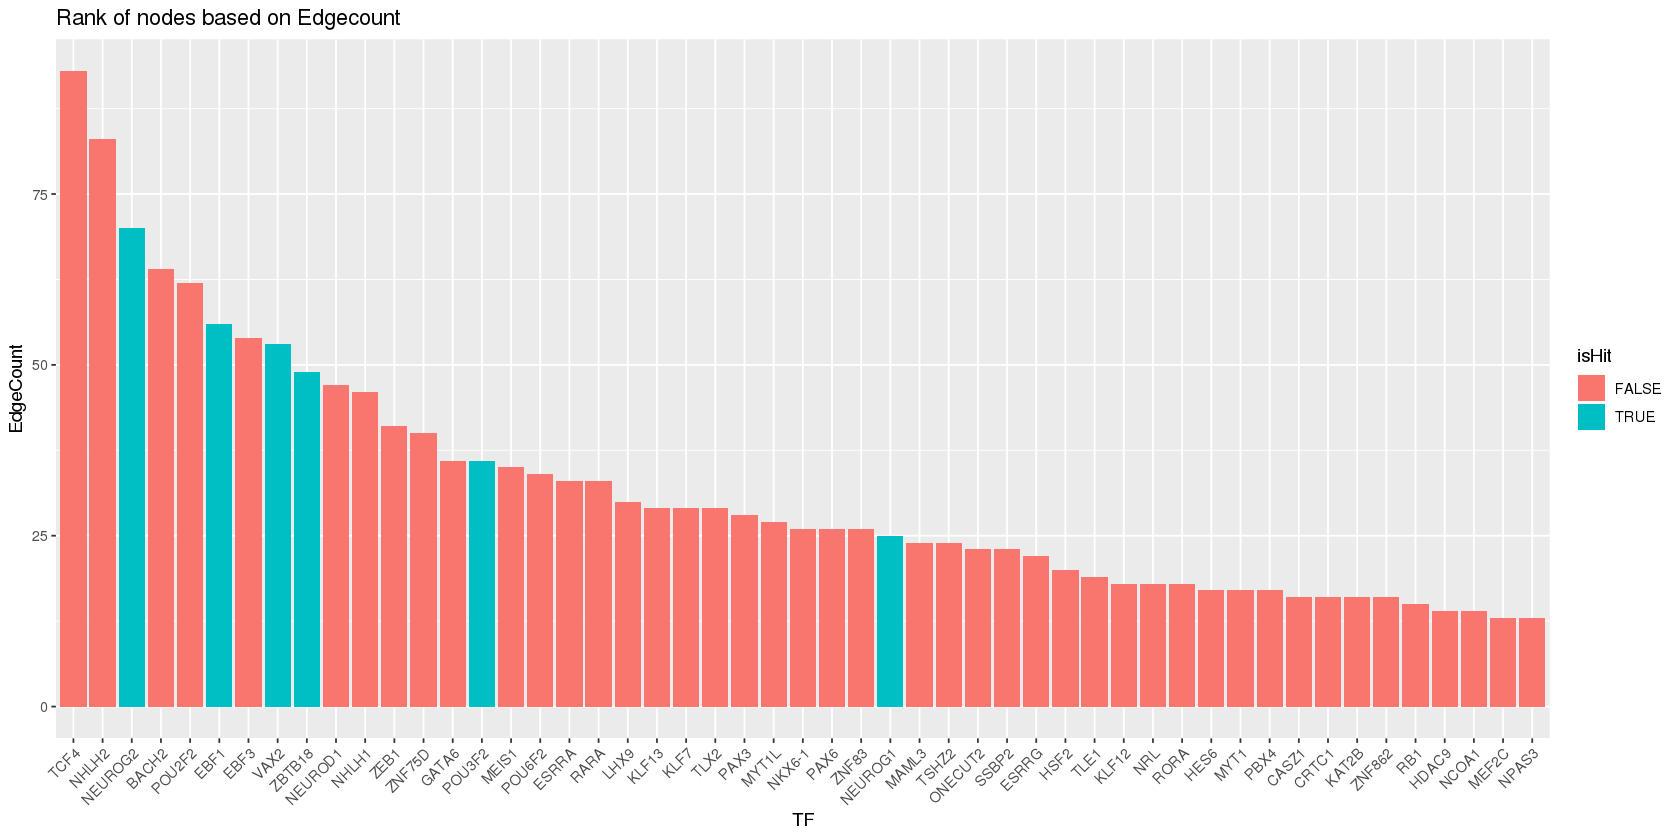

In [516]:
select(NGN.network.node_stats, name, EdgeCount, isHit, lev) %>% 
    arrange(desc(EdgeCount)) %>% 
    top_n(50, EdgeCount) %>%
    ggplot() + geom_bar(aes(x = reorder(name, -EdgeCount), y = EdgeCount, fill = isHit), stat = "identity") +
        labs(title = "Rank of nodes based on Edgecount") + xlab(label = "TF") +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))
        

## Level 1 target GO analysis

In [26]:
NGN.network.node_stats %>% filter(EdgeCount > 2 & lev %in% c("lev1", "lev2")) %>% pull(name) %>% unique %>% t

EBF1,NEUROD1,PAX3,POU6F2,EBF3,HES6,NHLH1,NKX6-1,POU3F2,ZBTB18,⋯,ZFHX3,ZNF197,ZNF491,DENND4A,LHX9,NRL,ONECUT2,MEIS1,HSF2,ZNF75D


In [27]:
# string PPI network
suppressMessages(string_ppi <- read_tsv("string_interactions_20200108.tsv"))

Compare with String PPI

In [28]:
inner_join(NGN.started.network.df, string_ppi, by = c("regulator_gene"="#node1", "target_gene"="node2")) %>%
    select(1:2, 40, 48:53)

regulator_gene,target_gene,lev,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NEUROG1,NEUROD1,lev1,0.744,0,0.000,0,0,0.041
NEUROG2,HES6,lev1,0.000,0,0.000,0,0,0.041
NEUROG2,NEUROD1,lev1,0.724,0,0.000,0,0,0.041
NEUROG2,NHLH1,lev1,0.000,0,0.082,0,0,0.082
NEUROG2,NKX6-1,lev1,0.000,0,0.000,0,0,0.041
NEUROG2,VAX2,lev2,0.000,0,0.000,0,0,0.041
NEUROD1,GATA6,lev2,0.000,0,0.000,0,0,0.041
NEUROD1,ZFHX3,lev2,0.000,0,0.000,0,0,0.041
PAX3,MEIS1,lev2,0.000,0,0.116,0,0,0.115


In [29]:
inner_join(NGN.started.network.df, string_ppi, by = c("target_gene"="#node1", "regulator_gene"="node2")) %>%
    select(1:2, 40, 48:53)

regulator_gene,target_gene,lev,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NEUROG1,EBF1,lev1,0.000,0,0.000,0.0,0,0.041
NEUROG1,PAX3,lev1,0.000,0,0.000,0.0,0,0.041
NEUROG2,EBF1,lev1,0.000,0,0.000,0.0,0,0.041
NEUROG2,POU3F2,lev1,0.000,0,0.000,0.0,0,0.041
NEUROG1,TCF4,lev2,0.000,0,0.778,0.0,0,0.778
NEUROG2,NHLH2,lev2,0.000,0,0.082,0.0,0,0.082
NEUROG2,TCF4,lev2,0.000,0,0.095,0.0,0,0.094
EBF1,HOMEZ,lev2,0.000,0,0.238,0.0,0,0.237
NEUROD1,NHLH2,lev2,0.000,0,0.000,0.0,0,0.041


In [20]:
getwd()

[1] "/gpfs/commons/groups/sanjana_lab/cdai/TFscreen"

In [30]:
# chip-seq dataset 

chip.peaks <- read.table("chip_seq_df_20200123.txt", header = T, stringsAsFactors = F)

In [31]:
head(chip.peaks)
chip.peaks$sample %>% unique

,chr,start,end,peak,score,strand,fc,pval,qval,summit_start,g_chr,g_start,g_end,gene,g_score,g_strand,sample
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>
1,chr1,7785324,7785496,N_0.5DPT_peak_136,35,.,3.04062,6.33160,3.54779,87,chr1,7782320,7786319,PER3,1,+,N_0.5DPT
2,chr1,8848918,8849097,N_0.5DPT_peak_158,130,.,5.95220,16.74423,13.07445,81,chr1,8846922,8850921,RERE,1,-,N_0.5DPT
3,chr1,26473115,26473364,N_0.5DPT_peak_449,113,.,4.75923,14.91840,11.34569,123,chr1,26470440,26474439,HMGN2,1,+,N_0.5DPT
4,chr1,26912584,26912771,N_0.5DPT_peak_460,60,.,4.32025,9.28048,6.09790,107,chr1,26911976,26915975,NR0B2,1,-,N_0.5DPT
5,chr1,92485730,92485899,N_0.5DPT_peak_1471,85,.,4.41611,11.96271,8.56506,96,chr1,92484926,92488925,GFI1,1,-,N_0.5DPT
6,chr1,150876810,150876979,N_0.5DPT_peak_1903,59,.,3.89195,9.08848,5.91570,25,chr1,150874709,150878708,ARNT,1,-,N_0.5DPT


[1] "N_0.5DPT"   "N_1DPT"     "N_2DPT"     "NFD_0.5DPT" "NFD_1DPT"  
[6] "NFD_2DPT"

setdiff of NFD - N, use the result to intersect with TF network

In [32]:
filter(inter2, regulator_gene == "NEUROG2") %>% head

regulator_gene,target_gene,atac.ES,atac.H16,atac.D1,atac.D4,tar.ge.ES,tar.ge.H16,tar.ge.D1,tar.ge.D4,⋯,reg.l2fc.H16,reg.l2fc.D1,reg.l2fc.D4,reg.fdr.H16,reg.fdr.D1,reg.fdr.D4,reg.isHit,tar.isHit,lev,inNetwork
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<chr>
NEUROG2,ABL1,8.421900,9.081113,9.974668,7.833035,5.1731935,6.529207,5.723459,8.246673,⋯,7.08892,7.990113,9.893931,3.985811e-09,7.743982e-12,8.486055e-19,TRUE,FALSE,NA,not_in_network
NEUROG2,ADNP2,3.155845,3.504240,5.018850,3.741398,9.0984955,9.291882,11.298799,5.948209,⋯,7.08892,7.990113,9.893931,3.985811e-09,7.743982e-12,8.486055e-19,TRUE,FALSE,NA,not_in_network
NEUROG2,AEBP2,8.206983,8.182517,8.151950,11.202832,8.1074589,6.034633,5.254064,4.774380,⋯,7.08892,7.990113,9.893931,3.985811e-09,7.743982e-12,8.486055e-19,TRUE,FALSE,NA,not_in_network
NEUROG2,AFF1,12.218528,12.544280,13.620079,14.191661,6.7820813,7.869602,5.009183,5.381708,⋯,7.08892,7.990113,9.893931,3.985811e-09,7.743982e-12,8.486055e-19,TRUE,FALSE,NA,not_in_network
NEUROG2,AFF3,28.052652,27.891003,31.335104,40.822114,0.8340168,2.101545,2.590285,8.470428,⋯,7.08892,7.990113,9.893931,3.985811e-09,7.743982e-12,8.486055e-19,TRUE,FALSE,lev2,in_network
NEUROG2,AGAP3,9.782277,9.121170,9.999983,11.384995,3.9770745,5.617504,6.733156,12.803835,⋯,7.08892,7.990113,9.893931,3.985811e-09,7.743982e-12,8.486055e-19,TRUE,FALSE,lev1,in_network


In [33]:
# NGN2 targets from network
network.NGN2.targets <- filter(inter2, regulator_gene == "NEUROG2" ) %>% pull(target_gene)

network.NGN2_1D_targets <- filter(inter2, regulator_gene == "NEUROG2" & lev %in% c("lev1" , "lev2")) %>% 
                        pull(target_gene)

network.NGN2_4D_targets <- filter(inter2, regulator_gene == "NEUROG2" & lev %in% c("lev3")) %>% 
                        pull(target_gene)

In [34]:
# chip targets

chip_1D_NFD_targets <- filter(chip.peaks, sample %in% c("NFD_1DPT")) %>%
                        pull(gene) %>% unique
chip_2D_NFD_targets <- filter(chip.peaks, sample %in% c("NFD_2DPT")) %>%
                        pull(gene) %>% unique
chip_1D_N_targets <- filter(chip.peaks, sample %in% c("N_1DPT")) %>%
                        pull(gene) %>% unique
chip_2D_N_targets <- filter(chip.peaks, sample %in% c("N_2DPT")) %>%
                        pull(gene) %>% unique
all_chip_targets <- chip.peaks$gene %>% unique

**Overall overlapping interactions**

In [35]:
#120 hit list
hitlist <- read.csv('/c/groups/sanjana_lab/cdai/TFscreen/Hitlist_20191230.csv', header = T, stringsAsFactors = F) %>% pull(hgnc_symbol)
#TF list
tflist <- read.csv('/c/groups/sanjana_lab/cdai/TFscreen/TFlist_20191230.csv', stringsAsFactors = F) %>% pull(hgnc_symbol)

In [36]:
library(VennDiagram)

Loading required package: grid

Loading required package: futile.logger



**All Time Points**

In [44]:
network.NGN2.targets %>% write.table("NGN2_motif_targets.csv", quote = F, sep = ",", row.names = F, col.names = F)
all_chip_targets %>% write.table("all_chip_targets.csv", quote = F, sep = ",", row.names = F, col.names = F)

In [37]:
vp.all <- venn.diagram(x=list(network.NGN2.targets, all_chip_targets, hitlist),
             category.names = c("NGN2 Motif Binding", "CHIP", "Hit TF"), 
             filename=NULL,
            
             # Output features
            imagetype="png" ,
            height = 720 , 
            width = 720 , 
            resolution = 300,
            compression = "lzw",

            # Circles
            lwd = 2,
            lty = 'blank',
            fill = c('#B3E2CD', '#FDCDAC', '#C8A8FB'),

            # Numbers
            cex = 2,
            fontface = "bold",
            fontfamily = "sans",

            # Set names
            cat.cex = 2,
            cat.fontface = "bold",
            cat.default.pos = "outer",
            cat.pos = c(-27, 27, 135),
            #cat.dist = c(0.055, 0.055, .055),
            cat.fontfamily = "sans"
            )

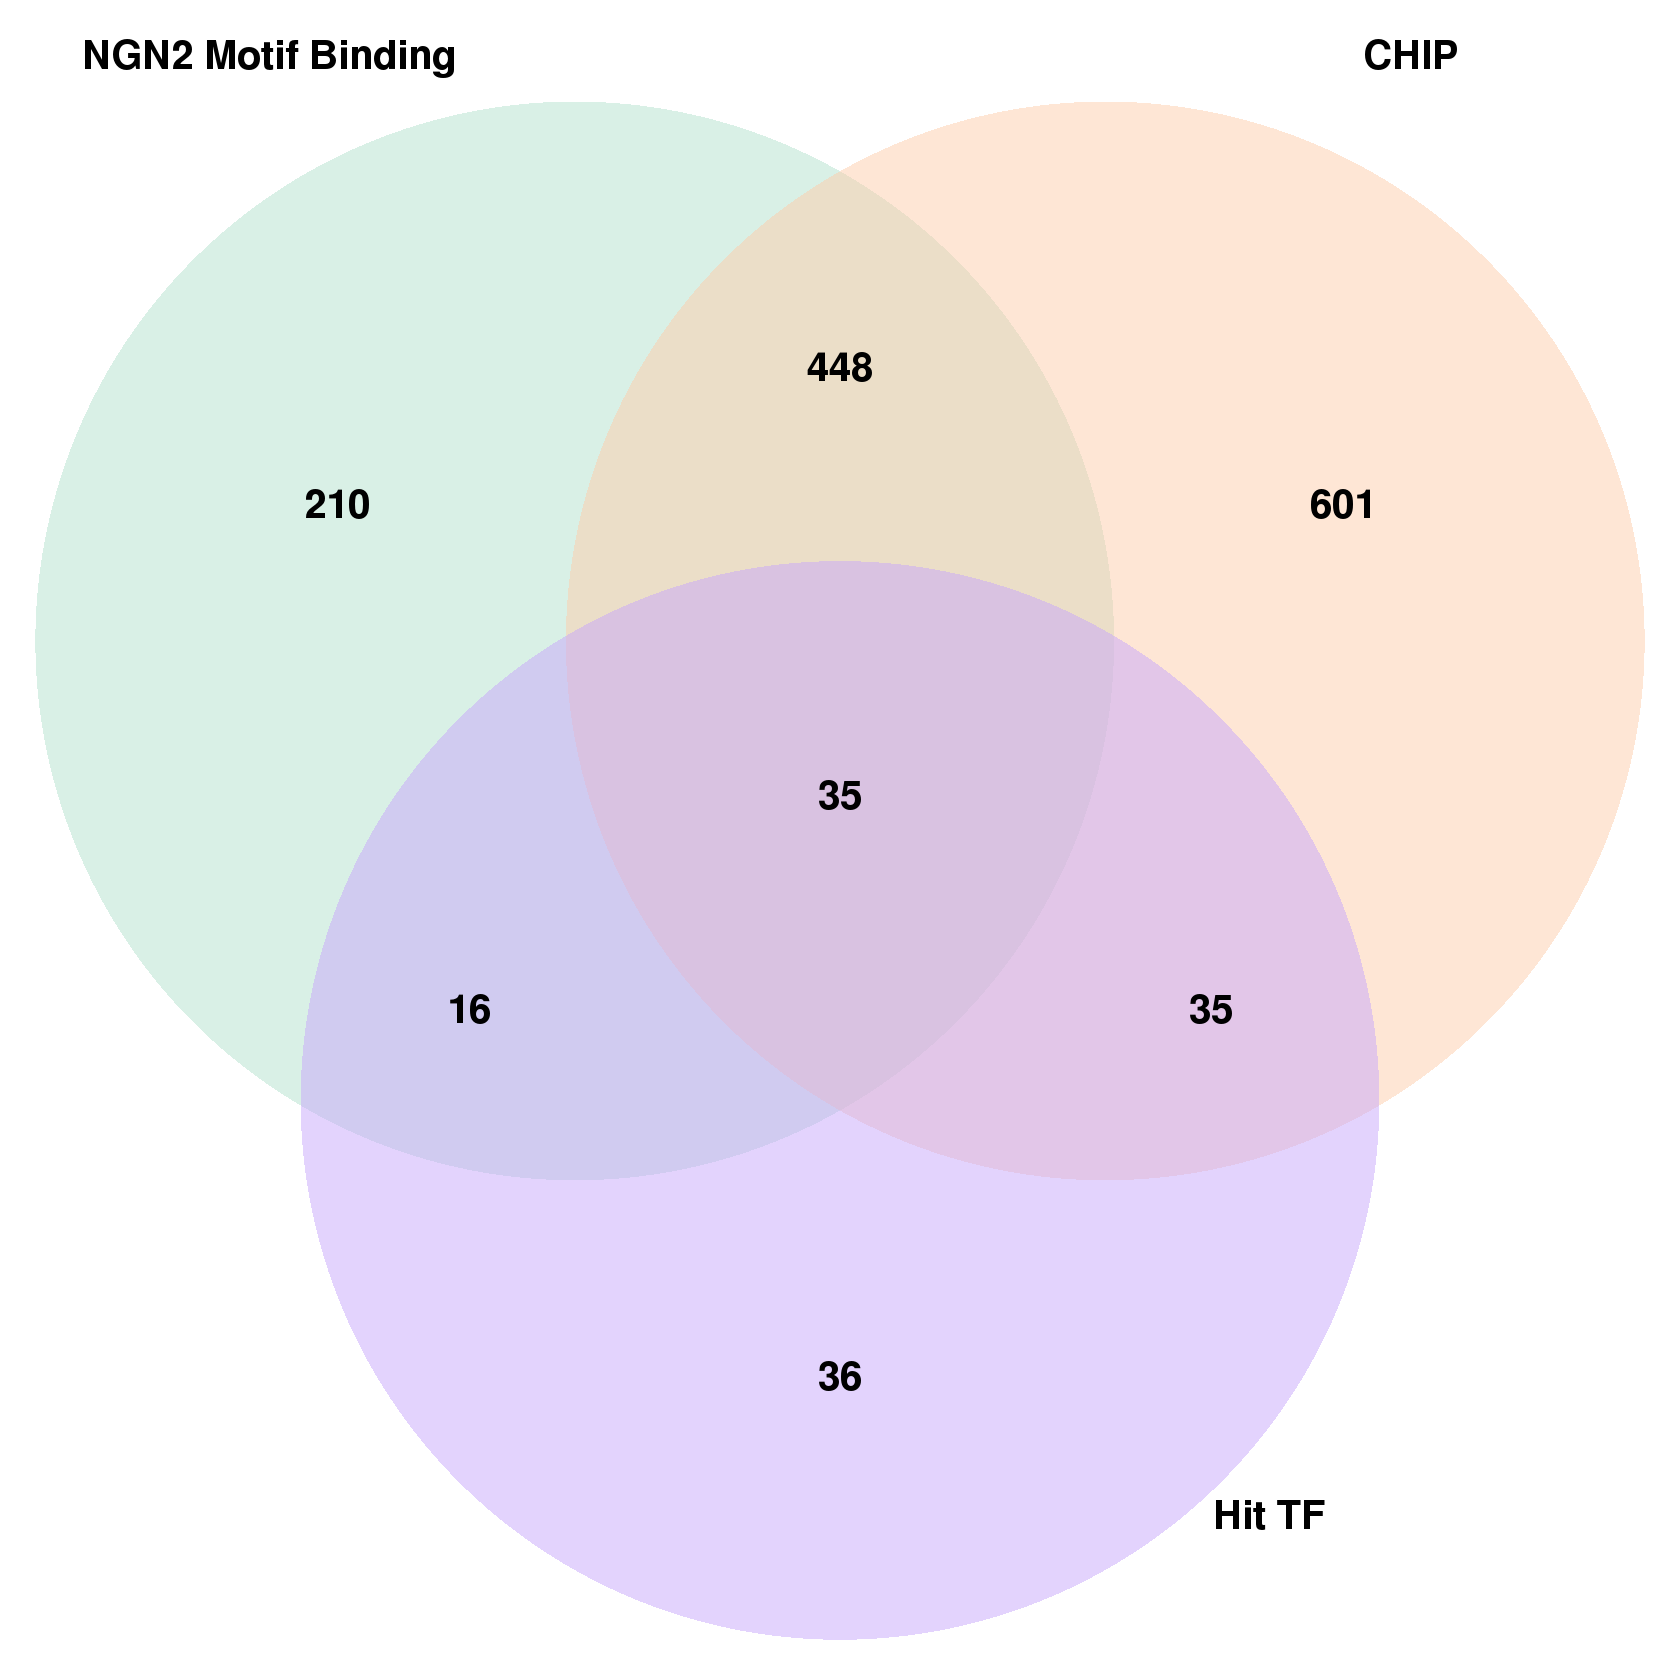

In [40]:
grid.draw(vp.all)

**Day 1**

In [128]:
vp.d1 <- venn.diagram(x=list(network.NGN2_1D_targets, all_chip_targets, hitlist),
             category.names = c("TF Network", "CHIP", "Hit TF"), 
             filename=NULL, 
             output = T, 
            
             # Output features
            imagetype="png" ,
            height = 720 , 
            width = 720 , 
            resolution = 300,
            compression = "lzw",

            # Circles
            lwd = 2,
            lty = 'blank',
            fill = c('#B3E2CD', '#FDCDAC', '#C8A8FB'),

            # Numbers
            cex = 2,
            fontface = "bold",
            fontfamily = "sans",

            # Set names
            cat.cex = 2,
            cat.fontface = "bold",
            cat.default.pos = "outer",
            #cat.pos = c(-27, 27, 135),
            #cat.dist = c(.1, .1, .1),
            cat.fontfamily = "sans"
            )

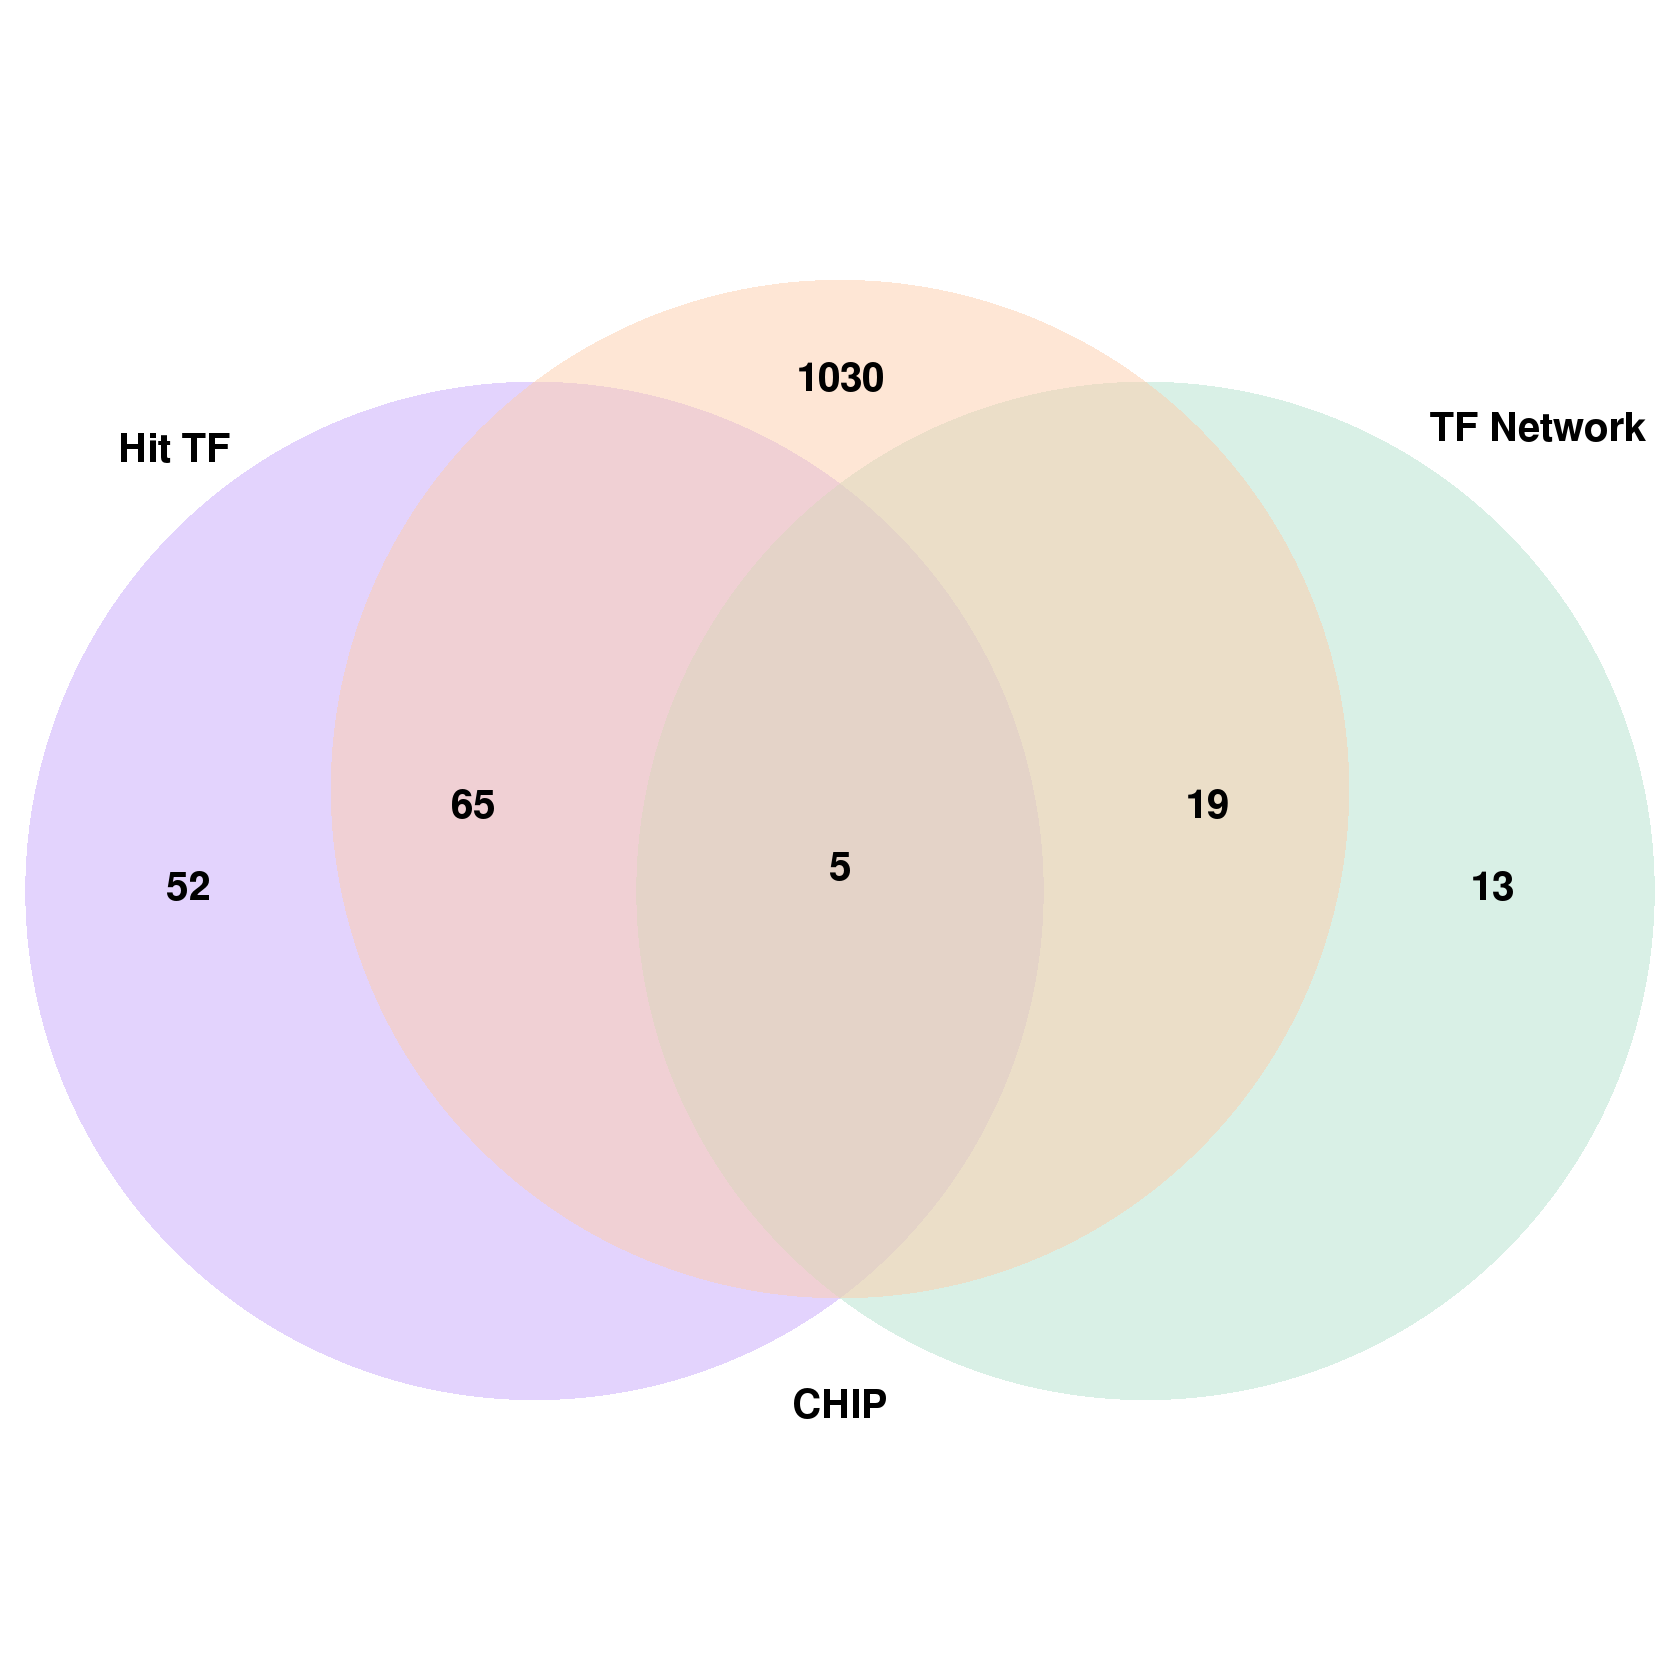

In [129]:
grid.draw(vp.d1)

**Day 4**

In [132]:
vp.d4 <- venn.diagram(x=list(network.NGN2_4D_targets, all_chip_targets, hitlist),
             category.names = c("TF Network", "CHIP", "Hit TF"), 
             filename=NULL, 
             output = T, 
            
             # Output features
            imagetype="png" ,
            height = 720 , 
            width = 720 , 
            resolution = 300,
            compression = "lzw",

            # Circles
            lwd = 2,
            lty = 'blank',
            fill = c('#B3E2CD', '#FDCDAC', '#C8A8FB'),

            # Numbers
            cex = 2,
            fontface = "bold",
            fontfamily = "sans",

            # Set names
            cat.cex = 2,
            cat.fontface = "bold",
            cat.default.pos = "outer",
            cat.pos = c(-27, 27, 135),
            #cat.dist = c(0.1, .1, .1),
            cat.fontfamily = "sans"
            )

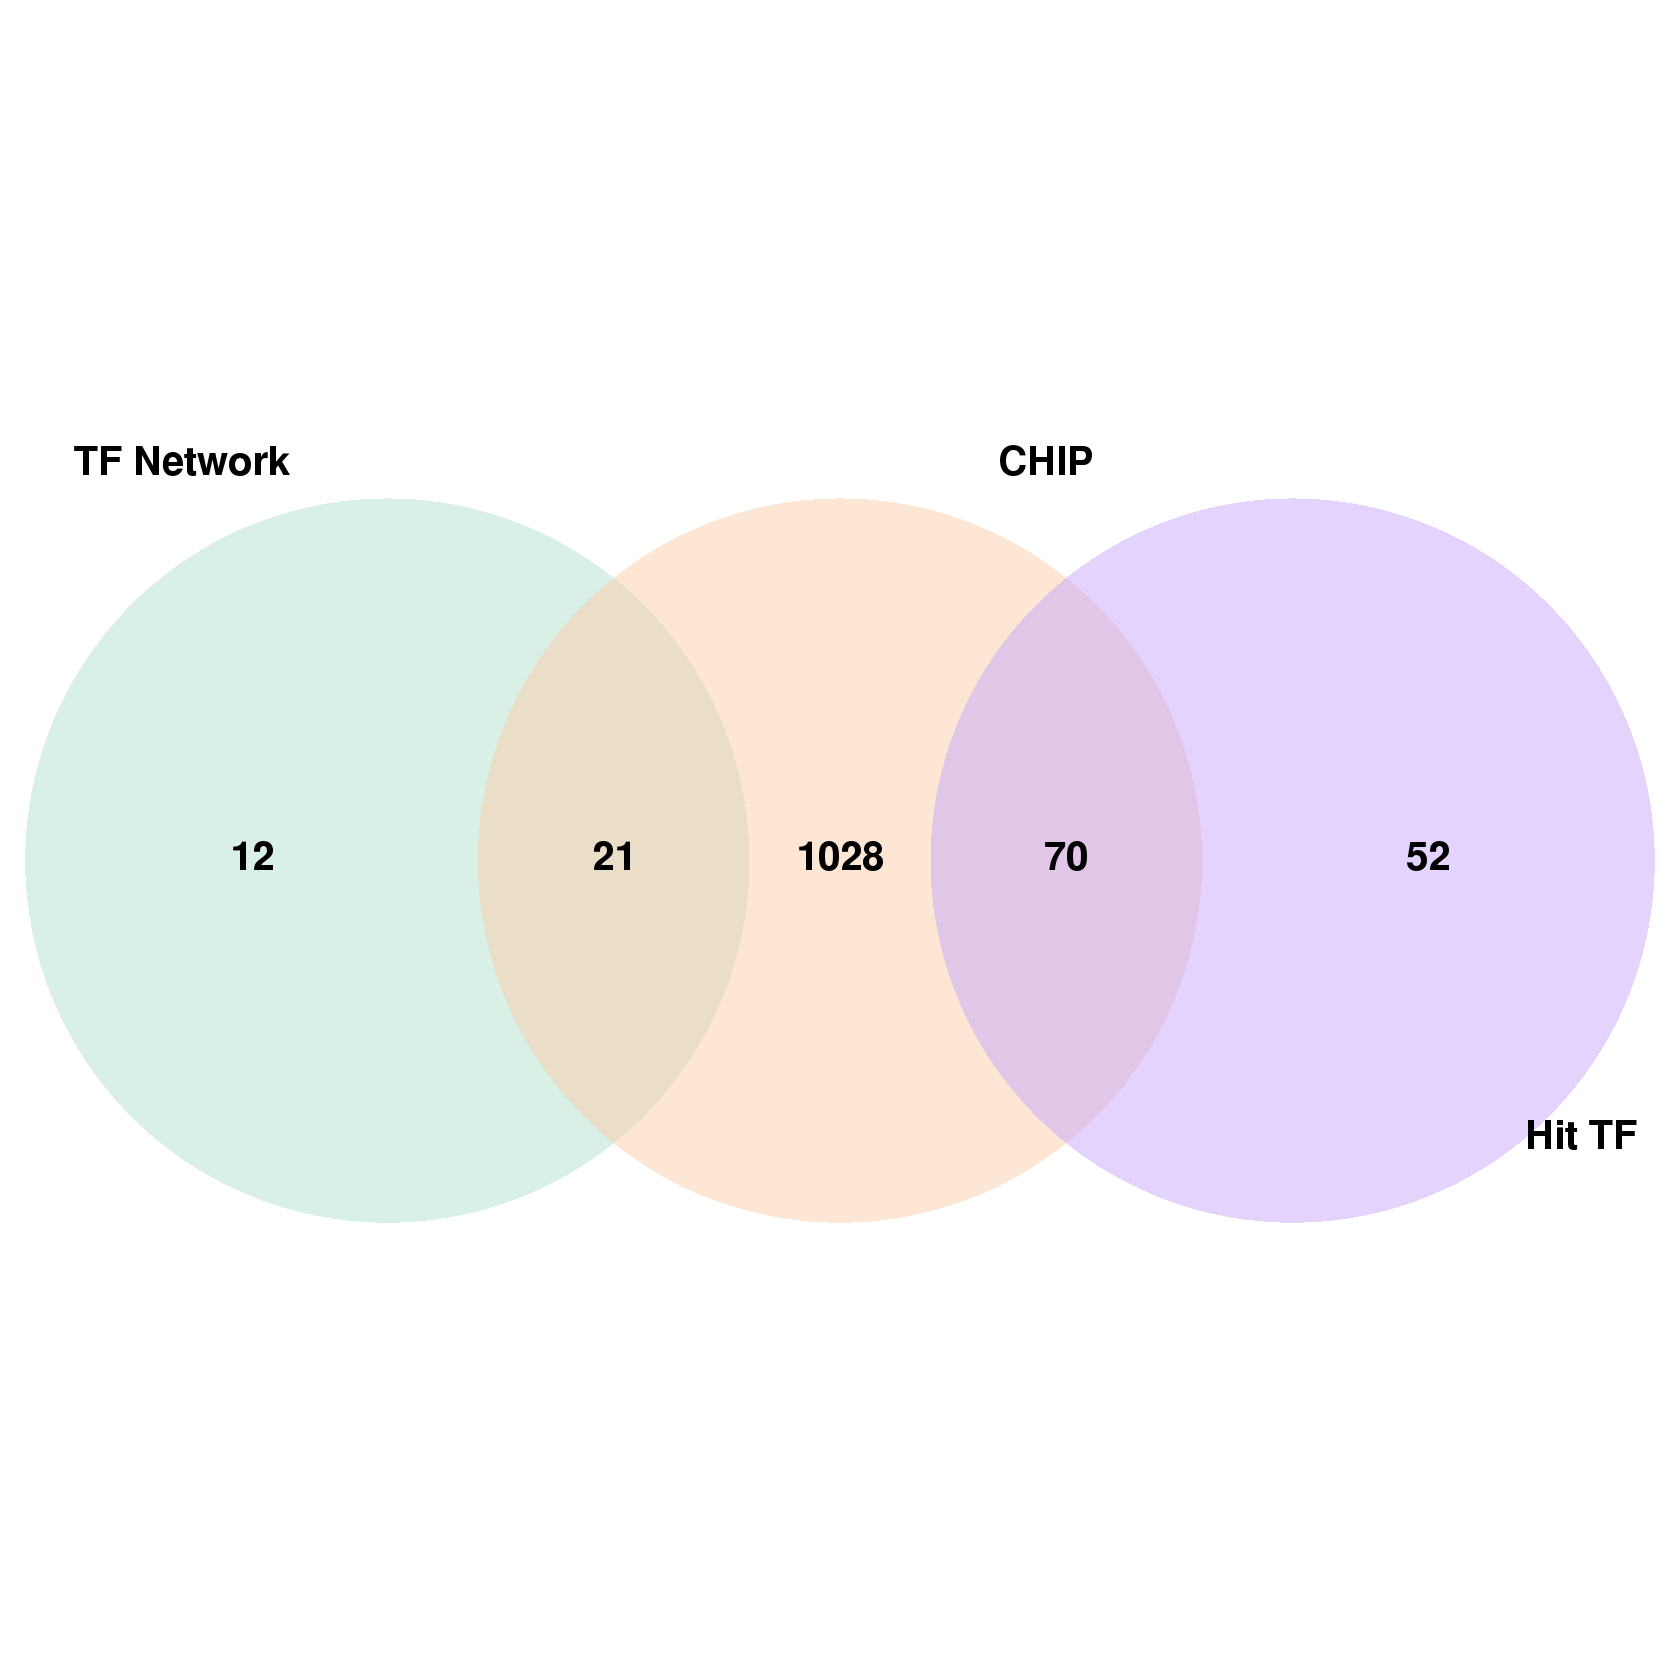

In [133]:
grid.draw(vp.d4)

In [163]:
targets <- c("E2F1" ,  "EBF1" ,  "JUND"  , "POU3F2", "ZBTB18" ,"SNAI2")

In [165]:
vp2 <- venn.diagram(x=list(targets, all_chip_targets, hitlist),
             category.names = c("TF Network", "CHIP", "Hit TF"), 
             filename=NULL, 
             output = T, 
            
             # Output features
            imagetype="png" ,
            height = 720 , 
            width = 720 , 
            resolution = 300,
            compression = "lzw",

            # Circles
            lwd = 2,
            lty = 'blank',
            fill = c('#B3E2CD', '#FDCDAC', '#C8A8FB'),

            # Numbers
            cex = 2,
            fontface = "bold",
            fontfamily = "sans",

            # Set names
            cat.cex = 2,
            cat.fontface = "bold",
            cat.default.pos = "outer",
            cat.pos = c(-27, 27, 135),
            #cat.dist = c(0.1, .1, .1),
            cat.fontfamily = "sans"
            )

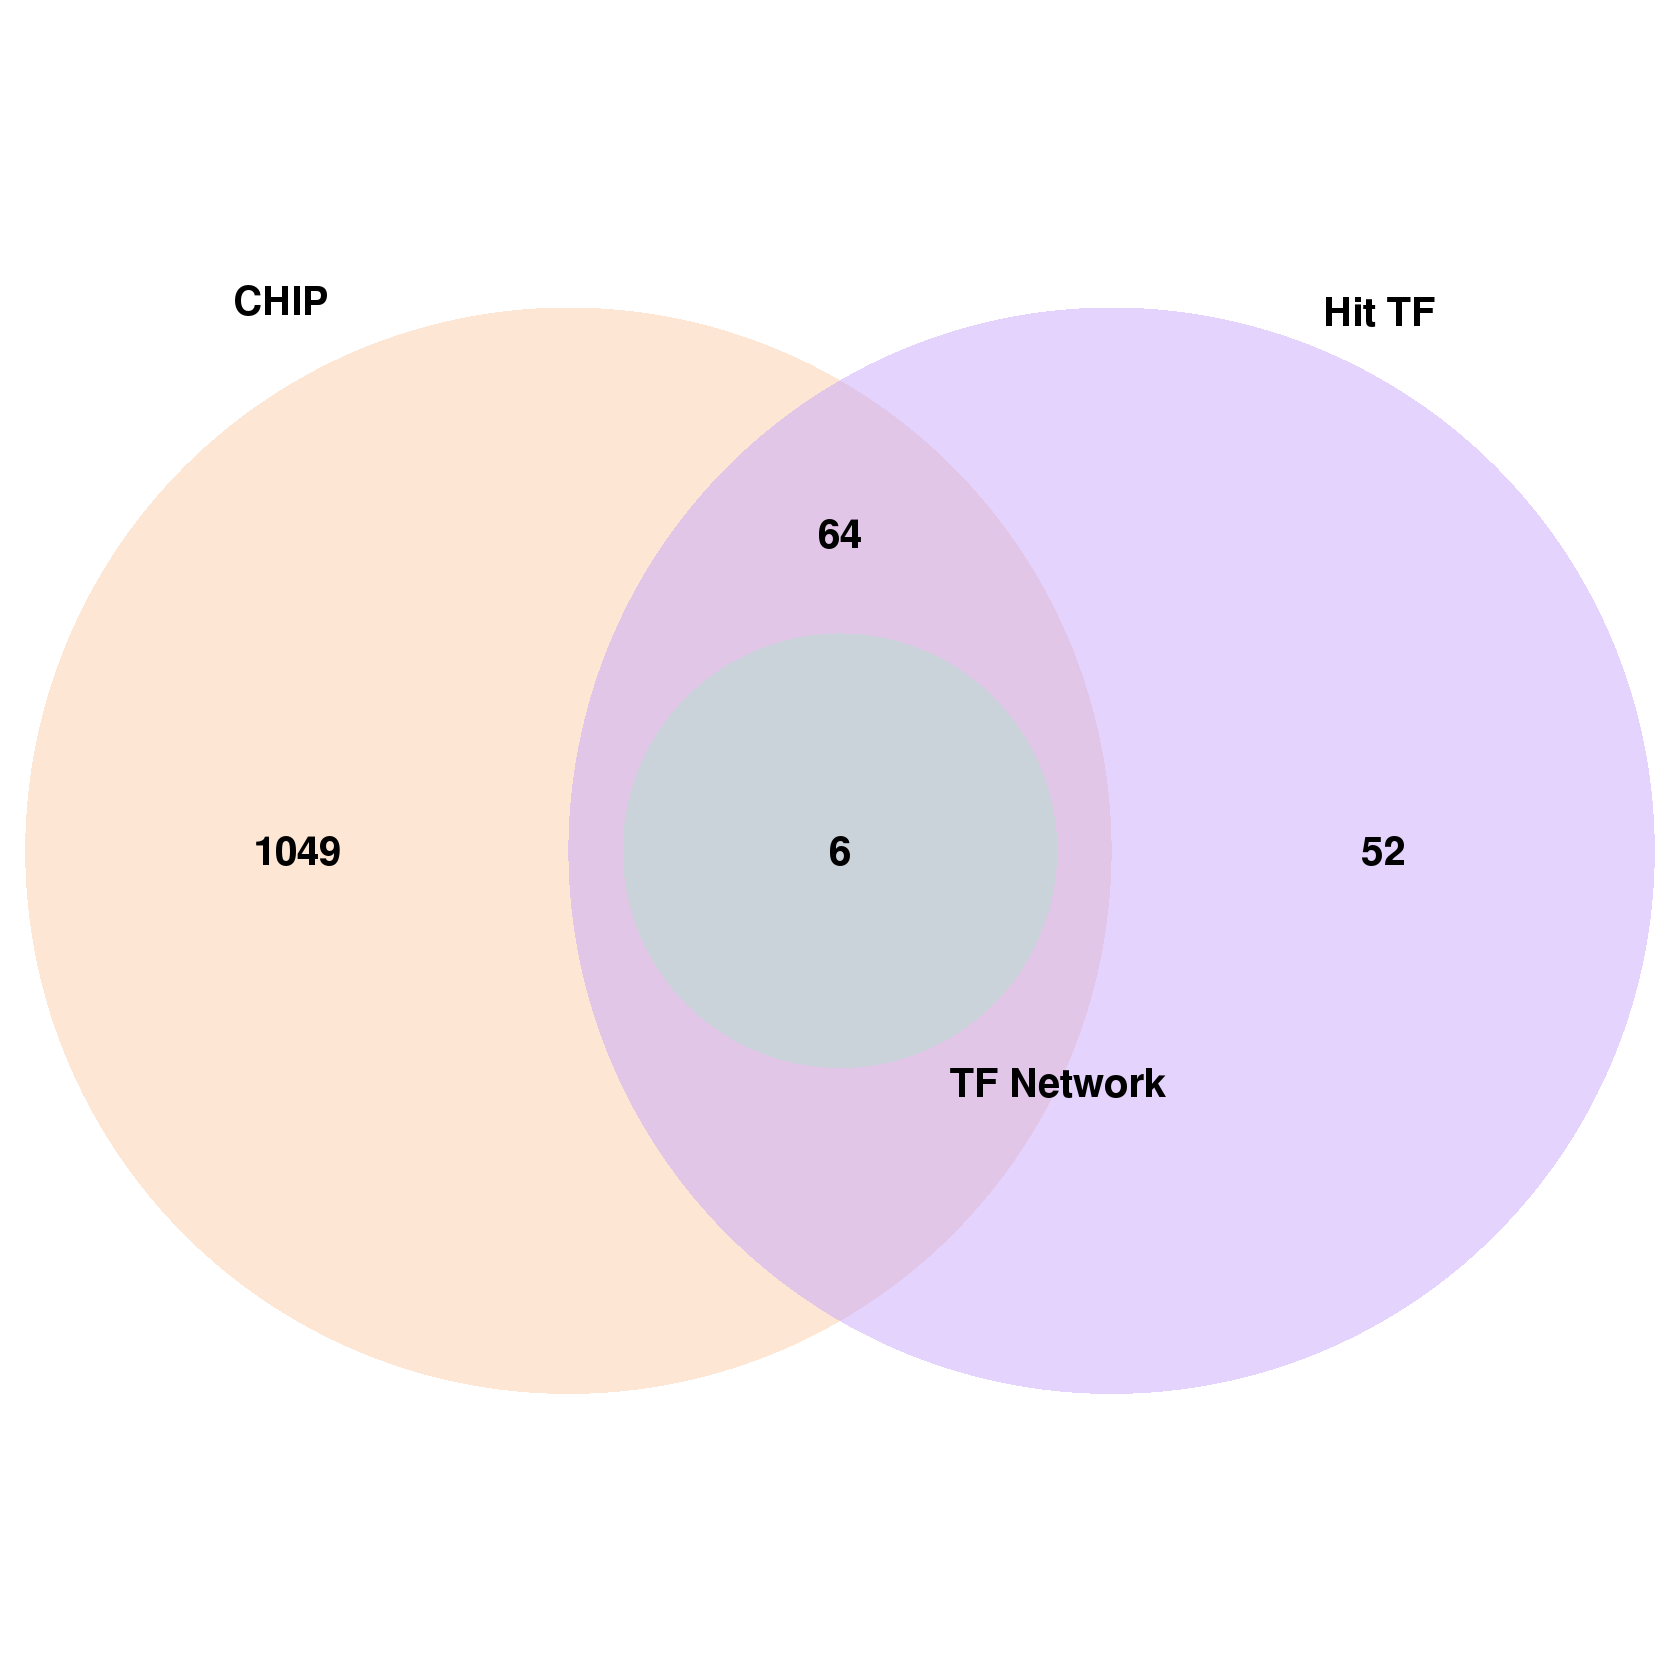

In [166]:
grid.draw(vp2)